# 딥러닝 모델 실습 3 
- 📌 실습 목표 <br>
tensorflow에서 제공하는 FashionMNIST 데이터 셋을 활용하여 모델 생성 및 훈련

## ✅ 데이터셋 불러오기

#### STEP 1. 라이브러리 불러오기

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

#### STEP 2. 데이터셋 불러오기

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# 학습 데이터와 테스트 데이터 나누기
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


#### STEP 3. Label 지정

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#### STEP 4. Train image 형태 확인

## ✅ 데이터 전처리

In [6]:
train_images.shape

(60000, 28, 28)

#### STEP 5. train_label 수 확인

In [7]:
len(train_labels)

60000

#### STEP 6. Test image 형태 확인

In [9]:
test_images.shape

(10000, 28, 28)

#### STEP 7. Image Normalization

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## ✅ 이미지 확인

#### STEP 8. 이미지 확인

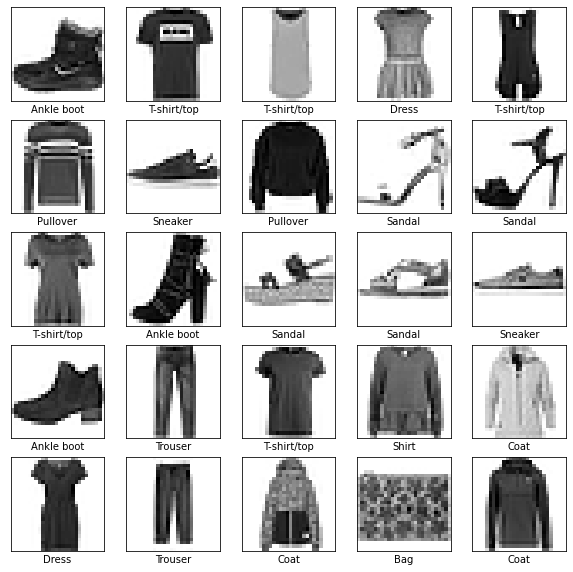

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## ✅ 모델 생성 및 컴파일


#### STEP 9. 모델 생성

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

#### STEP 10. 모델 컴파일

In [13]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

## ✅ 모델 훈련

#### STEP 11. 모델 훈련

In [14]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4951 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3710 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3337 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3128 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2788 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2677 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2495 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

## ✅ 정확도 평가 및 예측

#### STEP 12. 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\nTest accuracy: ", test_acc)

313/313 - 1s - loss: 0.3317 - accuracy: 0.8846 - 567ms/epoch - 2ms/step

Test accuracy:  0.8845999836921692


#### STEP 13. 예측하기

In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

array([5.2638420e-06, 6.6394577e-08, 7.7563186e-08, 8.3667233e-11,
       1.9918735e-08, 7.7649449e-05, 1.6823968e-07, 3.5869884e-03,
       4.6055728e-09, 9.9632972e-01], dtype=float32)

## ✅ 예측 결과 확인 함수 선언

#### STEP 14. 예측값 그래프로 표현

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

## ✅ 예측 결과 확인

#### STEP 15. 예측 확인

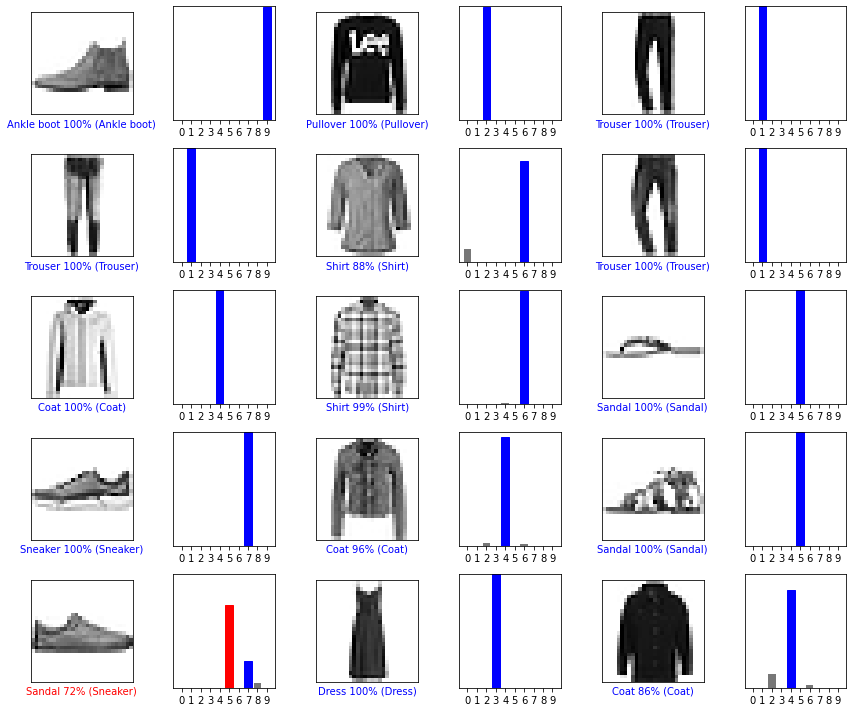

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows,2*num_cols, 2*i+1)
  plot_image(i, predictions[i],test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

fatal: not a git repository (or any of the parent directories): .git
